In [4]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("ggplot2")
library(ggplot2)
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
# Instalar y cargar las bibliotecas necesarias
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Autenticarse con Google Drive
drive_auth()

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=1dd454f70ef72c28c87affb60da0f99a&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVR4M0xZNEV6cWlSQzZnVE5nVEFmR1llbW85YnBiVWJqNktLRkFXRl96MkdNdGg5Q1RVT2RDdC1IN1cxN1NTajJnSXZCZyIsInN0YXRlIjoiMWRkNDU0ZjcwZWY3MmMyOGM4N2FmZmI2MGRhMGY5OWEifQ==


In [7]:
# Especificar el ID del archivo y la ruta de destino
file_id <- "https://drive.google.com/file/d/1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz/view?usp=drivesdk"  # Reemplaza este ID con el ID de tu archivo
drive_download(as_id(file_id), path = "archivo.csv", overwrite = TRUE)

File downloaded:

• Documento de César García <id: 1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz>

Saved locally as:

• archivo.csv



In [8]:
# Leer el archivo CSV desde la URL
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv("archivo.csv", show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [9]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100268   Length:149066      Length:149066      Length:149066     
 1st Qu.:1023935   Class :character   Class :character   Class :character  
 Median :1078773   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1017279                                                           
 3rd Qu.:1149220                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:149066      Length:149066      Length:149066      Length:149066     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [10]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,⋯,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours,changed_pcs
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Calibration,VF2500,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,⋯,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Erick Garcia Lima,7/14/2023,0.08333333,0.08,0.003333333,$0.74,0.08333333,0,0
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC012,Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,1/17/2024,3.00000000,3.00,0.000000000,$12.50,2.00000000,1,2
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC005,Broken machine head ball joint / Rotura de biela de cabezal,⋯,Replace machine head ball joint / Reemplazar biela de cabezal,JERONIMO FUNEZ,3/18/2023,0.25000000,0.00,0.250000000,$2.67,0.25000000,0,0


**LIMPIEZA DE DATOS**

In [11]:
sapply(df, function(x) sum(is.na(x)))
#Fiabilidad suficiente para continuar con el trabajo

equipment      operation        wo_type     base_model   problem_code 
             0              0              0              0              0 
  problem_desc   failure_code   failure_desc     cause_code     cause_desc 
             0              0              0              0              0 
   action_code    action_desc       mechanic           date downtime_gross 
             0              0              0              0              0 
  pit_coverage  real_downtime     parts_cost   repair_hours  waiting_hours 
             0              0              0              0              0 
   changed_pcs 
             0

In [12]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

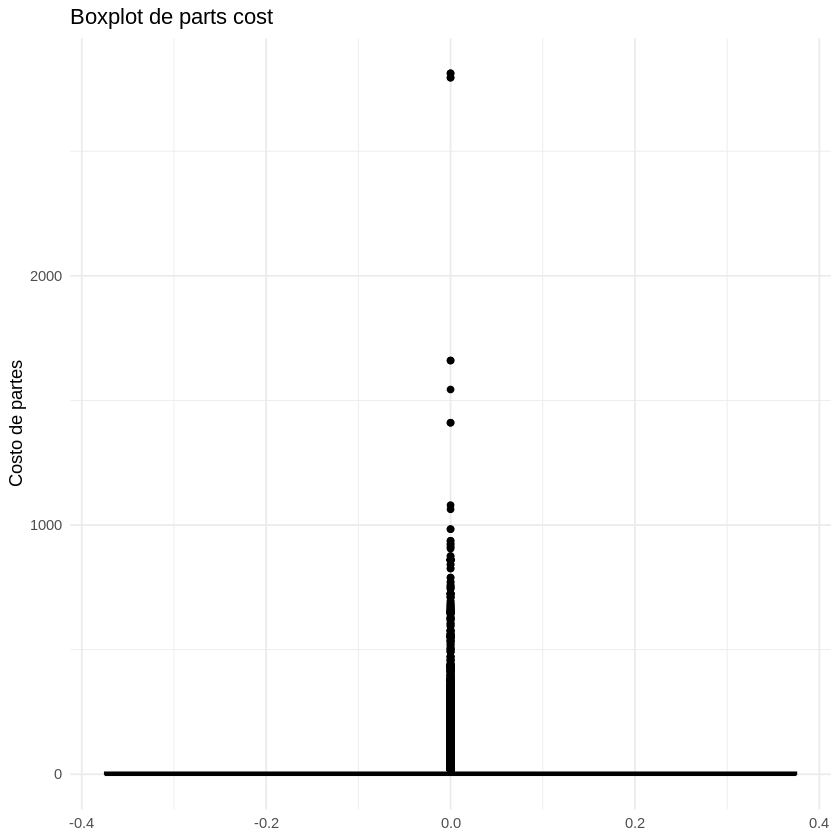

In [13]:
# Crear el boxplot de parts_cost
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo de partes') +
  theme_minimal()
#Hacer rangos, 1 desv tip, 2 desp tipica, etc...

In [14]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [16]:
mean(df$downtime_gross < 0)

[1] 2.683375e-05

In [17]:
# Filtrar registros donde downtimeGross no sea negativo
df_filtered <- df %>%
  filter(downtime_gross >= 0)

In [18]:
mean(df$repair_hours < 0)

[1] 1.341688e-05

In [19]:
# Calcular valor absoluto de repair hours
df$repair_hours <- abs(df$repair_hours)
#Quitarlo poco porcentaje de datos

In [20]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours)
#Se han eliminado codigos y variables calculadas

In [21]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")
#Colocar comentario de por qué el filtro, colocar que tecnicas pueden aplicarse y cuales no, colocar en apartado diferente

In [22]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [23]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

In [24]:
#Cambio de nombre de mecánico cuyo nombre está escrito de dos formas
df <- df %>%
  mutate(mechanic = ifelse(mechanic == "GALEAS PEREZ EDWIN ROGELIO", "Edwin Rogelio Galeas Perez", mechanic))

In [25]:
# Calcular la tabla de frecuencias de cause_desc
freq_cause_desc <- table(df$cause_desc)

# Definir umbral de baja frecuencia (por ejemplo, menos de 5 observaciones)
umbral <- 800

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_cause_desc)[freq_cause_desc < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$cause_desc[df$cause_desc %in% categorias_baja_frecuencia] <- "Otros"

In [26]:
# Calcular la tabla de frecuencias de action_desc
freq_action_desc <- table(df$action_desc)

# Definir umbral de baja frecuencia
umbral <- 800

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_action_desc)[freq_action_desc < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$action_desc[df$action_desc %in% categorias_baja_frecuencia] <- "Otros"

In [27]:
# Calcular la tabla de frecuencias de operation
freq_operation <- table(df$operation)

# Definir umbral de baja frecuencia
umbral <- 1600

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_operation)[freq_operation < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$operation[df$operation %in% categorias_baja_frecuencia] <- "Otros"

In [28]:
# Calcular la tabla de frecuencias de mechanic
freq_mechanic <- table(df$mechanic)

# Definir umbral de baja frecuencia
umbral <- 200

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_mechanic)[freq_mechanic < umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$mechanic[df$mechanic %in% categorias_baja_frecuencia] <- "Otros"

In [29]:
# Calcular la tabla de frecuencias de base model
freq_base_model <- table(df$base_model)

# Definir umbral de baja frecuencia
umbral <- 657

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_base_model)[freq_base_model< umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$base_model[df$base_model %in% categorias_baja_frecuencia] <- "Otros"

In [30]:
# Calcular la tabla de frecuencias de problem_desc
freq_problem_desc <- table(df$problem_desc)

# Definir umbral de baja frecuencia
umbral <- 1000

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_problem_desc)[freq_problem_desc< umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$problem_desc[df$problem_desc %in% categorias_baja_frecuencia] <- "Otros"

In [31]:
# Calcular la tabla de frecuencias de failure_desc
freq_failure_desc <- table(df$failure_desc)

# Definir umbral de baja frecuencia
umbral <- 1000

# Identificar categorías con baja frecuencia
categorias_baja_frecuencia <- names(freq_failure_desc)[freq_failure_desc< umbral]

# Reemplazar categorías con baja frecuencia por "Otros"
df$failure_desc[df$failure_desc %in% categorias_baja_frecuencia] <- "Otros"

In [32]:
#Convertir horas a minutos
df$downtime_gross <-df$downtime_gross*60

**ANALISIS DE VARIABLES**

In [33]:
dim(df)

[1] 135860     15

In [34]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,25222,25222,0.1856470
Otros,22388,47610,0.3504343
HEM BOTTOM,15840,63450,0.4670249
JOIN PANEL,7800,71250,0.5244369
SET SLEEVE,7743,78993,0.5814294
TAPE SHOULDER,7556,86549,0.6370455
HEM AROUND,5256,91805,0.6757324
FLAT SEAM,4987,96792,0.7124393
JOIN SHOULDER,4857,101649,0.7481893


In [35]:
# Calcular la frecuencia de problemas de maquinaria
problem_freq <- df %>%
  group_by(problem_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
problem_freq <- problem_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
problem_freq

problem_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
It sews with defect / Cose con defecto,95025,95025,0.6994332
It does not sew / No cose,31930,126955,0.9344546
Otros,4491,131446,0.9675107
It does not cut the thread / No corta el hilo,2214,133660,0.9838069
It does not cut the trim off / No corta el desperdicio,1177,134837,0.9924702
It does not cut the cloth / No corta la tela,1023,135860,1.0000000


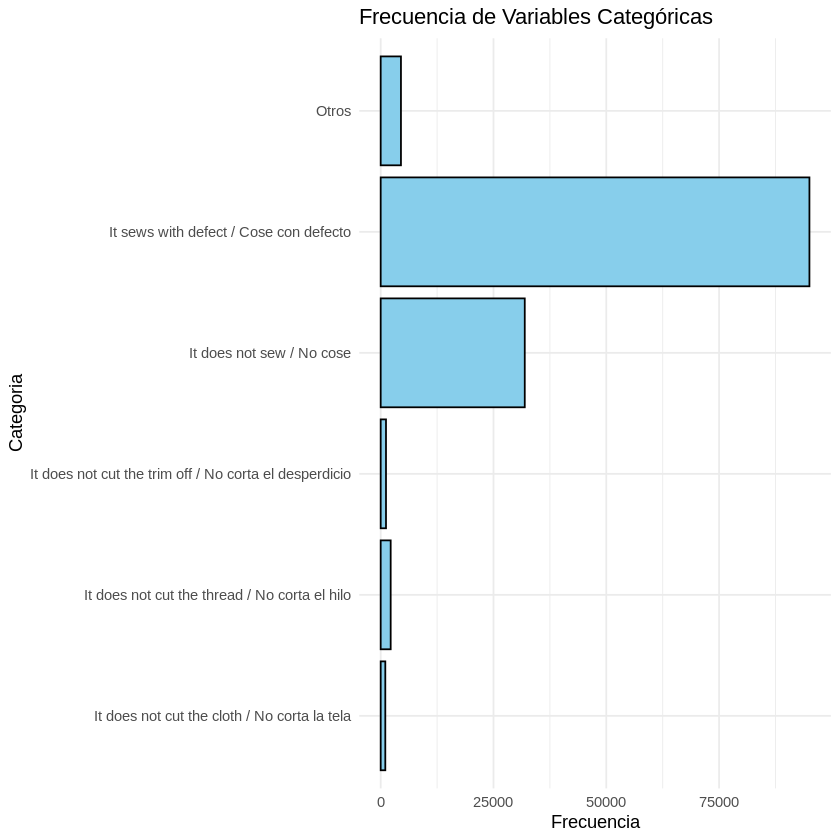

In [36]:
# Crear el gráfico de barras
ggplot(df, aes(y = problem_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()
#Ordenar, es util frecuencia acumulada top 3

In [37]:
# Calcular la frecuencia de fallos de maquinaria
failure_freq <- df %>%
  group_by(failure_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
failure_freq <- failure_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
failure_freq

failure_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Machine head failure stopping sewing / Falla cabezal dejando de coser,64021,64021,0.4712277
Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,36833,100854,0.7423377
Trim off device failure / Falla dispositivo corta desperdicio,13704,114558,0.8432062
Otros,3774,118332,0.8709848
Chain cutter failure / Falla corta cadenetas,2967,121299,0.8928235
Folder failure / Falla doblillador,2816,124115,0.9135507
Monitoring and control failure / Falla monitoreo y control,1975,126090,0.9280877
Engine failure / Falla motor,1854,127944,0.9417341
Lubrication system failure / Falla sistema de lubricación,1511,129455,0.9528559


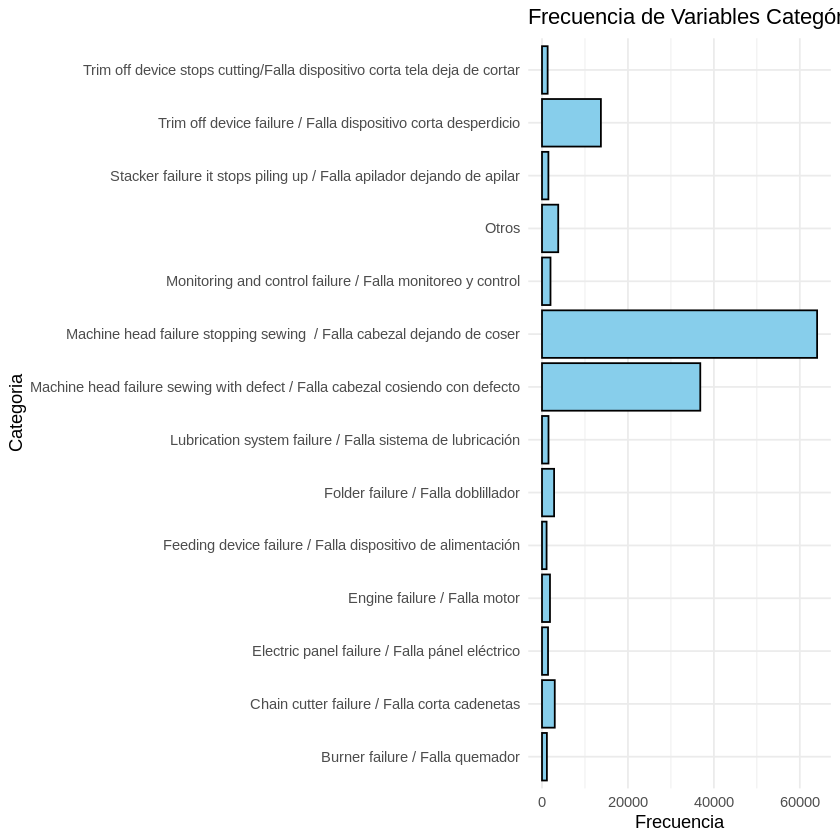

In [38]:
# Crear el gráfico de barras
ggplot(df, aes(y = failure_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()
#Ordenar, es util frecuencia acumulada top 3
#Colocar porcentaje a la derecha

In [39]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
cause_freq <- cause_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
cause_freq

cause_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Otros,26748,26748,0.1968791
Misadjusted machine head looper / Enlazador de cabezal desajustado,24259,51007,0.3754380
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,12994,64001,0.4710805
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,11344,75345,0.5545782
Broken machine head ball joint / Rotura de biela de cabezal,8786,84131,0.6192478
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,6194,90325,0.6648388
Misadjusted machine head teeth / Dientes de cabezal desajustados,5733,96058,0.7070367
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,5387,101445,0.7466878
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,4551,105996,0.7801855


In [40]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
action_freq <- action_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
action_freq
#Grafica de distribución

action_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Otros,25800,25800,0.1899014
Adjust machine head looper / Ajustar enlazador de cabezal,18275,44075,0.3244148
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,11409,55484,0.4083910
Adjust machine head teeth / Ajustar dientes de cabezal,9699,65183,0.4797807
Sharpen knife / Afilar cuchillas,9087,74270,0.5466657
Replace machine head ball joint / Reemplazar biela de cabezal,8826,83096,0.6116296
Replace machine head looper / Reemplazar enlazador de cabezal,7719,90815,0.6684455
Adjusted machine head presser foot / Ajustar prensatela de cabezal,6843,97658,0.7188135
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,6205,103863,0.7644855


In [41]:
# Calcular la frecuencia de fallos resueltos por mecanicos
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
mechanic_freq <- mechanic_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
mechanic_freq

mechanic,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Otros,4011,4011,0.02952304
Antony Ulloa,3226,7237,0.05326807
Jose Manuel Perez Zepeda,3034,10271,0.07559988
Omar Maldonado,2768,13039,0.09597380
Erick Garcia Lima,2533,15572,0.11461799
Ronald Antonio Herrera,2434,18006,0.13253349
Edwin Colindres,2389,20395,0.15011777
DIEGO CUELLAR,2247,22642,0.16665685
Carlos Alberto Alfaro Salamanca,2234,24876,0.18310025


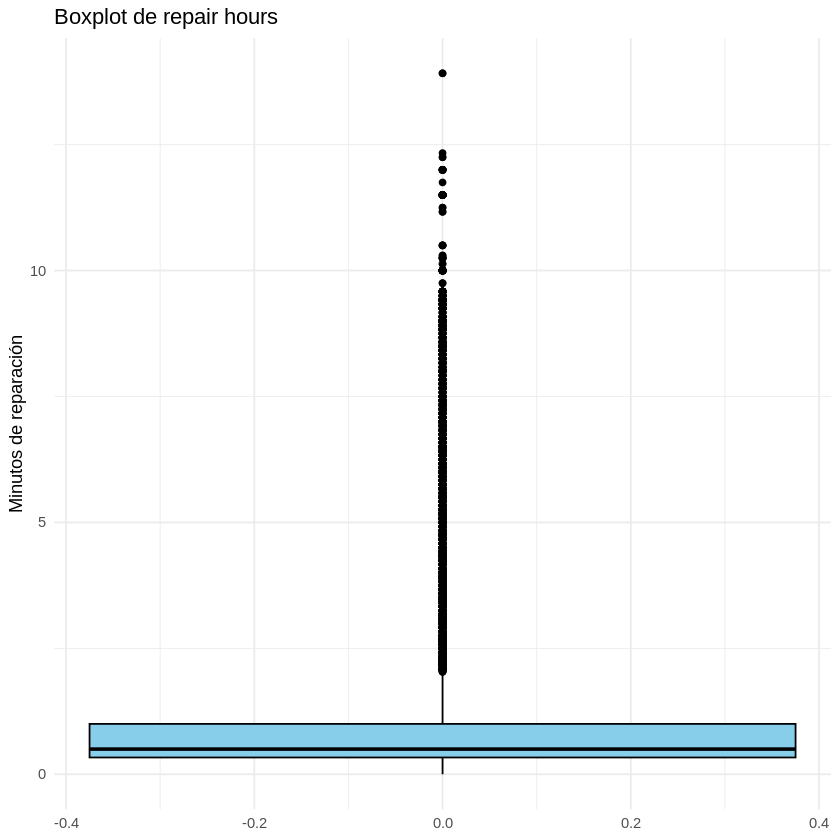

In [92]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de repair time',
       y = 'Minutos de reparación') +
  theme_minimal()
#Replicar gráfico con y sin outliers, analizar la frecuencia por rangos, medir con desviación típica, intentar medir cada cuanto ocurre el outlier, recomendación a añadir

**ANALISIS DE VARIABLE OBJETIVO "DOWNTIME GROSS"**

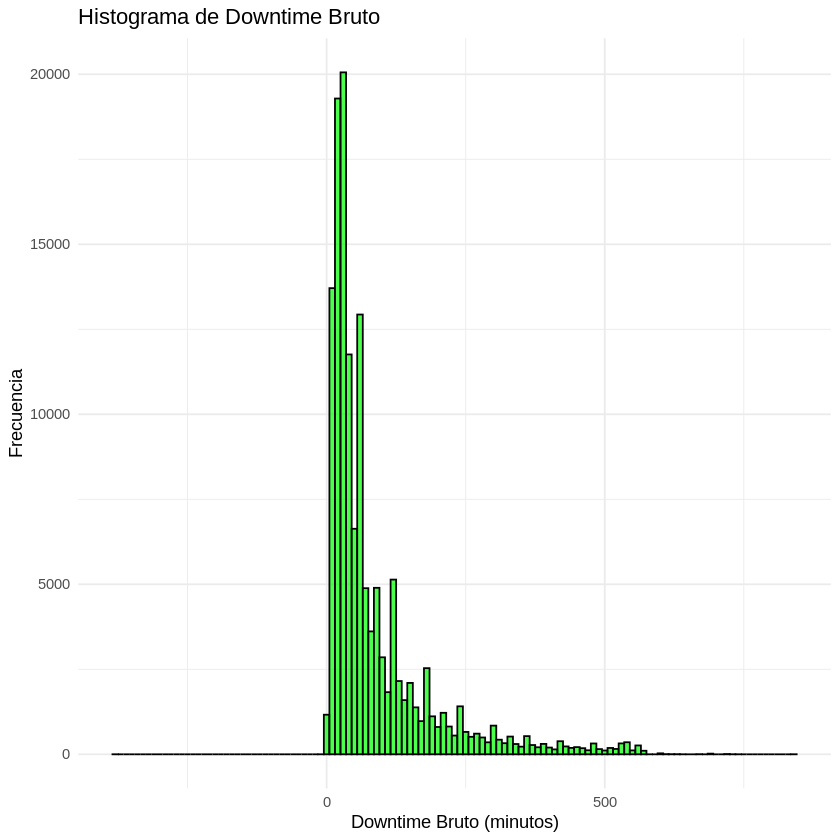

In [89]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 10, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (minutos)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)
#Hacerlo más grande

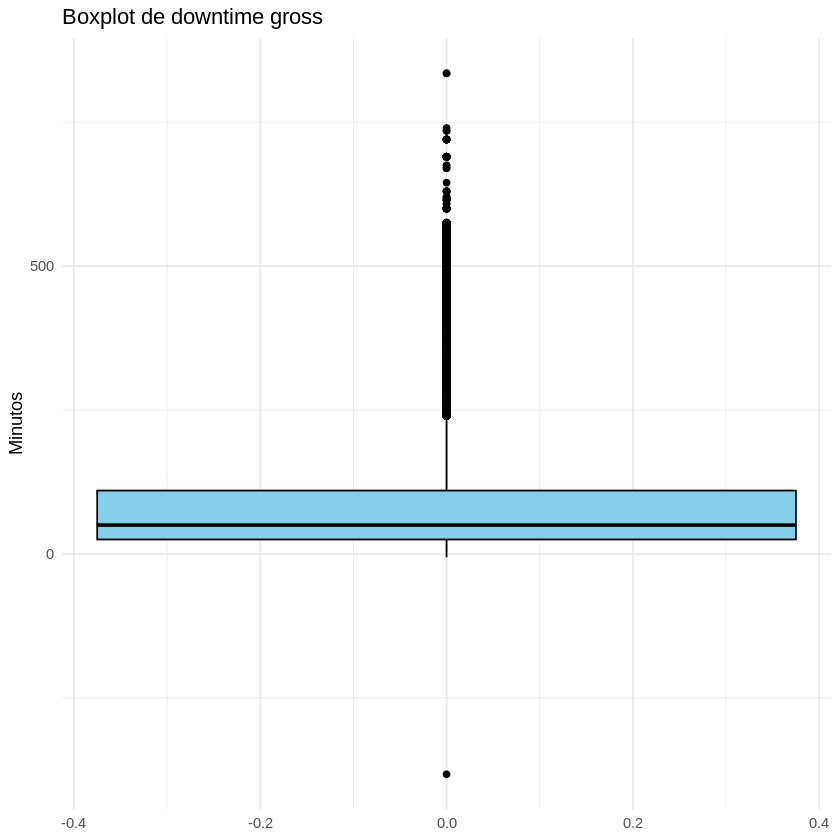

In [85]:
# Crear el boxplot de downtime gross
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal()

**MODELO DE REGRESION LINEAL INICIAL PARA PREDECIR DOWNTIME**



In [45]:
df <- select(df, -wo_type)
#Comparar con un glm

In [46]:
head(df,5)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,repair_hours,changed_pcs,Days_Between_Failures
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,It does not cut the trim off / No corta el desperdicio,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.00,0.1666667,0,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,1.0000000,1,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,1.0000000,1,0
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,2023-01-03,30,60.69,0.5000000,1,2
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,2023-01-03,30,60.69,0.5000000,1,0


In [47]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data1 <- df[trainIndex,]

# Crear conjunto de prueba
test_data1 <- df[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data1), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data1), "\n")

Dimensiones del conjunto de entrenamiento:  95103 14 
Dimensiones del conjunto de prueba:  40757 14 


In [48]:
# Inicializar y ajustar el modelo de regresión lineal
#Dividir en entrenamiento, test, validación por ejemplo 70,20,10
model1 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -Days_Between_Failures -date -changed_pcs, data = train_data1)
# Resumen del modelo
summary(model1)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - Days_Between_Failures - date - changed_pcs, 
    data = train_data1)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                128.958504
operationBIND LEG                                                                           -1.903550
operationCLOSE SLEEVE                                                                       17.784583
operationFLAT LOCK                                                                         -12.285025
operationFLAT SEAM                                                                          -5.787287
operationHEM AROUND                                                                          7.765239
operationHEM BOTTOM                                                                         -6.759387
operation

In [49]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model1, newdata = test_data1)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data1$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  91.4648 
Test MAE:  59.92997 
Test R-squared:  0.1911776 


**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [50]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [51]:
# Calcular la mediana de tiempo de reparación
df <- df %>%
  group_by(equipment) %>%
  mutate(Median_Repair_Time = median(repair_hours, na.rm = TRUE))

In [52]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

In [53]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data2 <- df[trainIndex,]

# Crear conjunto de prueba
test_data2 <- df[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data2), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data2), "\n")

Dimensiones del conjunto de entrenamiento:  95103 17 
Dimensiones del conjunto de prueba:  40757 17 


**MODELO DE REGRESION LINEAL PARA PREDECIR DOWNTIME CON MAS VARIABLES**

In [54]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -changed_pcs, data = train_data2)
# Resumen del modelo
summary(model2)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - changed_pcs, data = train_data2)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 9.627e+01
operationBIND LEG                                                                          -5.465e+00
operationCLOSE SLEEVE                                                                       1.672e+01
operationFLAT LOCK                                                                         -1.075e+01
operationFLAT SEAM                                                                         -9.824e+00
operationHEM AROUND                                                                         9.079e+00
operationHEM BOTTOM                                                                        -7.798e+00
operationHEM SLEEVE                   

In [55]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model2, newdata = test_data2)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data2$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  89.77756 
Test MAE:  58.43397 
Test R-squared:  0.2207428 


**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [56]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [57]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [58]:
head(df_merged,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,repair_hours,changed_pcs,Days_Between_Failures,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,It does not cut the trim off / No corta el desperdicio,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.0,0.1666667,0,2,1,0.5,51.0,26
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,1.0000000,1,2,1,1.0,19.2,23
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,1.0000000,1,0,2,1.0,38.4,23


In [59]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df_merged$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data3 <- df_merged[trainIndex,]

# Crear conjunto de prueba
test_data3 <- df_merged[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data3), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data3), "\n")

Dimensiones del conjunto de entrenamiento:  95103 18 
Dimensiones del conjunto de prueba:  40757 18 


In [60]:
# Inicializar y ajustar el modelo de regresión lineal
model3 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -changed_pcs, data = train_data3)
# Resumen del modelo
summary(model3)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - changed_pcs, data = train_data3)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 8.697e+01
operationBIND LEG                                                                          -4.967e+00
operationCLOSE SLEEVE                                                                       1.758e+01
operationFLAT LOCK                                                                         -9.281e+00
operationFLAT SEAM                                                                         -8.698e+00
operationHEM AROUND                                                                         9.110e+00
operationHEM BOTTOM                                                                        -7.479e+00
operationHEM SLEEVE                   

In [61]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model3, newdata = test_data3)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data3$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  89.74648 
Test MAE:  58.3979 
Test R-squared:  0.2212823 


**MODELO AGREGANDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [62]:
# Primero, calcula la media de antiquity
mean_antiquity <- mean(df_mechanic$antiquity, na.rm = TRUE)

# Realiza el left join y luego reemplaza los NA en antiquity con la media calculada
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic") %>%
  mutate(antiquity = ifelse(is.na(antiquity), mean_antiquity, antiquity))

In [63]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir la proporción de entrenamiento
train_proportion <- 0.70

# Crear índices de muestreo para el conjunto de entrenamiento
trainIndex <- createDataPartition(df_merged2$downtime_gross, p = train_proportion, list = FALSE)

# Crear conjunto de entrenamiento
train_data4 <- df_merged2[trainIndex,]

# Crear conjunto de prueba
test_data4 <- df_merged2[-trainIndex,]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data4), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data4), "\n")

Dimensiones del conjunto de entrenamiento:  95103 19 
Dimensiones del conjunto de prueba:  40757 19 


In [64]:
# Inicializar y ajustar el modelo de regresión lineal
model4 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -changed_pcs, data = train_data4)
# Resumen del modelo
summary(model4)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - changed_pcs, data = train_data4)

Coefficients: (1 not defined because of singularities)
                                                                                             Estimate
(Intercept)                                                                                 8.697e+01
operationBIND LEG                                                                          -4.967e+00
operationCLOSE SLEEVE                                                                       1.758e+01
operationFLAT LOCK                                                                         -9.281e+00
operationFLAT SEAM                                                                         -8.698e+00
operationHEM AROUND                                                                         9.110e+00
operationHEM BOTTOM                                                                        -7.479e+

In [65]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model4, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  89.74648 
Test MAE:  58.3979 
Test R-squared:  0.2212823 


**AGREGANDO LA VARIABLE "CHANGED_PCS"**

In [66]:
# Inicializar y ajustar el modelo de regresión lineal
model5 <- glm(downtime_gross~. -equipment -downtime_gross -repair_hours -date -antiquity, data = train_data4)
# Resumen del modelo
summary(model5)


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date - antiquity, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 8.424e+01
operationBIND LEG                                                                          -1.186e+01
operationCLOSE SLEEVE                                                                       9.396e+00
operationFLAT LOCK                                                                         -1.124e+01
operationFLAT SEAM                                                                         -9.261e+00
operationHEM AROUND                                                                         1.632e+00
operationHEM BOTTOM                                                                        -1.293e+01
operationHEM SLEEVE                     

In [67]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model5, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.48675 
Test MAE:  39.6228 
Test R-squared:  0.5726188 


**IMPLEMENTACION DE FRONTWARD**

In [68]:
sapply(df_merged2, function(x) sum(is.na(x)))

equipment                   operation 
                          0                           0 
                 base_model                problem_desc 
                          0                           0 
               failure_desc                  cause_desc 
                          0                           0 
                action_desc                    mechanic 
                          0                           0 
                       date              downtime_gross 
                          0                           0 
                 parts_cost                repair_hours 
                          0                           0 
                changed_pcs       Days_Between_Failures 
                          0                           0 
   Cumulative_Failure_Count          Median_Repair_Time 
                          0                           0 
Cumulative_Maintenance_Cost                         Age 
                          0                           0 
                  antiquity 
                          0

In [69]:
# Realizar backward elimination
model_null <- lm(downtime_gross ~ 1, data = train_data4)
model_forward <- step(model_null,
                      scope = list(lower = model_null, upper = model5),
                      direction = "forward")
model_forward$anova

Start:  AIC=879347.8
downtime_gross ~ 1

                               Df Sum of Sq       RSS    AIC
+ changed_pcs                   1 499134887 486663238 812219
+ mechanic                    142 156105703 829692421 863236
+ Median_Repair_Time            1  94511951 891286173 869765
+ base_model                   38  47450983 938347141 874732
+ operation                    18  46368442 939429682 874802
+ action_desc                  30  27672268 958125856 876700
+ cause_desc                   29  25377353 960420771 876925
+ problem_desc                  5  24637928 961160196 876951
+ failure_desc                 13  13158080 972640044 878096
+ parts_cost                    1   8455335 977342789 878531
+ Age                           1   5357476 980440649 878832
+ Days_Between_Failures         1   3757162 982040962 878987
+ Cumulative_Maintenance_Cost   1   3200688 982597436 879040
+ Cumulative_Failure_Count      1    978361 984819763 879255
<none>                                      

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,95102,985798124,879347.8
+ changed_pcs,-1,499134886.52,95101,486663238,812218.5
+ mechanic,-142,64790791.02,94959,421872447,798915.2
+ operation,-18,2229618.62,94941,419642828,798447.3
+ Median_Repair_Time,-1,839940.90,94940,418802887,798258.7
+ cause_desc,-29,612514.17,94911,418190373,798177.5
+ Cumulative_Maintenance_Cost,-1,316733.97,94910,417873639,798107.5
+ problem_desc,-5,207107.40,94905,417666532,798070.3
+ failure_desc,-13,335149.97,94892,417331382,798020.0


In [70]:
formula = as.formula("downtime_gross ~ changed_pcs + mechanic + operation + Median_Repair_Time +
    cause_desc + Cumulative_Maintenance_Cost + problem_desc +
    failure_desc + base_model + action_desc + Days_Between_Failures +
    Age + Cumulative_Failure_Count")

In [73]:
# Inicializar y ajustar el modelo de regresión lineal
model6 <- glm(formula = formula, data = train_data4)
# Resumen del modelo
summary(model6)


Call:
glm(formula = formula, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 8.423e+01
changed_pcs                                                                                 5.395e+01
mechanicAdalberto Jeremias Rodriguez Zometa                                                -3.284e+01
mechanicAlfonso Escobar                                                                    -4.619e+01
mechanicAngel Mex                                                                          -3.953e+01
mechanicAnthony Murillo                                                                    -3.387e+01
mechanicAntony Ulloa                                                                       -2.977e+01
mechanicCain Alfredo Ramirez                                                               -1.728e+00
mechanicCarlos Al

**MODELO RANDOM FOREST**

In [76]:
# Entrenar el modelo de Random Forest
model_rf <- randomForest(downtime_gross~. -equipment -downtime_gross -repair_hours -date -antiquity, data = train_data4, importance = TRUE)

# Ver el resumen del modelo
print(model_rf)


Call:
 randomForest(formula = downtime_gross ~ . - equipment - downtime_gross -      repair_hours - date - antiquity, data = train_data4, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 3273.793
                    % Var explained: 68.42


In [77]:
# Hacer predicciones en el conjunto de prueba
predictions <- predict(model_rf, newdata = test_data4)

# Calcular el Error Cuadrático Medio (MSE)
mse <- mean((test_data4$downtime_gross - predictions)^2)
print(paste("MSE:", mse))

# Calcular el Coeficiente de Determinación (R^2)
r_squared <- 1 - (sum((test_data4$downtime_gross - predictions)^2) / sum((test_data4$downtime_gross - mean(test_data4$downtime_gross))^2))
print(paste("R^2:", r_squared))

[1] "MSE: 3184.64561776227"
[1] "R^2: 0.692102388704736"


In [79]:
residuals <- test_data4$downtime_gross - predictions

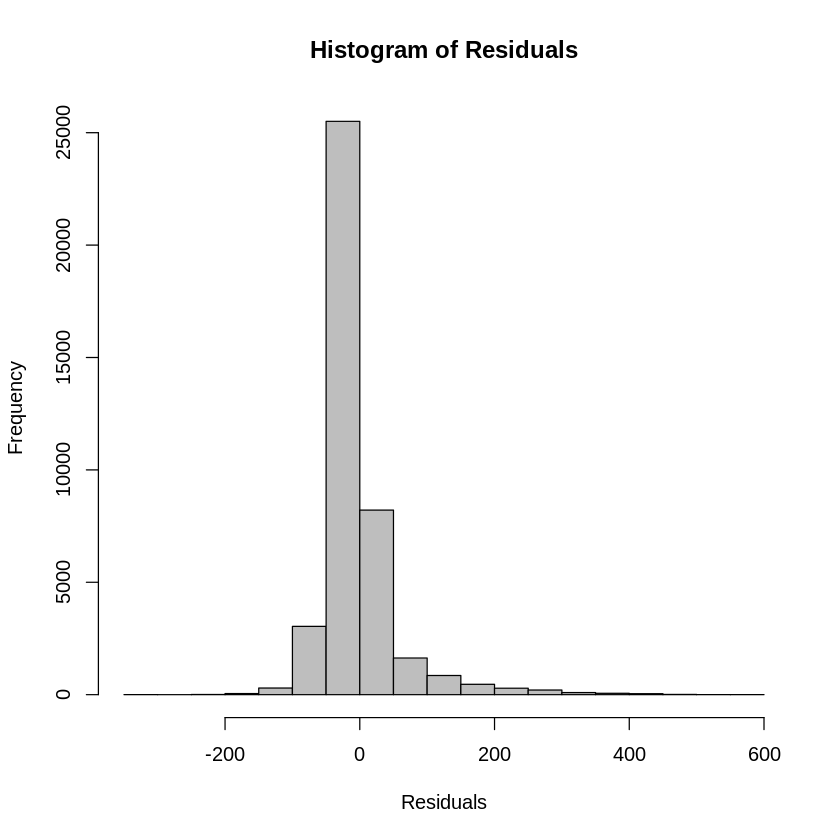

In [82]:
# Crear el histograma de los residuales
hist(residuals,
     main = "Histogram of Residuals",
     xlab = "Residuals",
     breaks = 30,
     col = "gray")

,%IncMSE,IncNodePurity
operation,63.153370,29464406
base_model,86.582831,30518835
problem_desc,97.350350,17951396
failure_desc,77.059863,20111170
cause_desc,73.523468,29080158
action_desc,105.538984,29925093
mechanic,130.904669,52514229
parts_cost,52.555129,29010955
changed_pcs,400.355199,439903071
Days_Between_Failures,1.791368,28203343


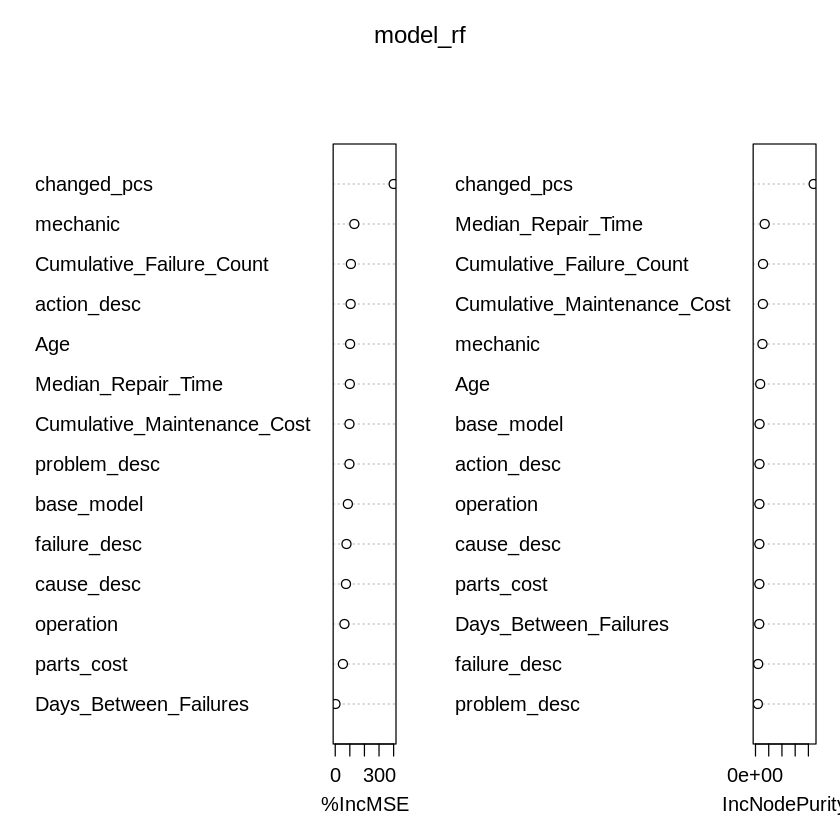

In [83]:
# Ver la importancia de las variables
importance(model_rf)
varImpPlot(model_rf)